## Setup and Load Data

First, we retrieve the dataste from https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021.

If using the below cell, make sure you have a Kaggle API token in a `kaggle.json` file in `~/.kaggle/`. Otherwise, please download the data manually and place it under a folder `./data/`.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples



In [159]:
moscow_df = pd.read_csv('data/Moscow.csv')

In [160]:
moscow_df.isnull().values.any()

False

In [161]:
moscow_df.sample(5)

,Unnamed: 0,price,date,building_type,level,levels,rooms,area,kitchen_area,object_type
249429,2542456,2000000,2019,monolithic,2,3,1,50.0,11.0,new
105443,1023670,4500000,2019,brick,4,25,1,42.5,11.0,preowned
10788,112021,5100000,2018,brick,5,10,3,80.0,12.0,preowned
45661,422286,9500000,2018,panel,6,25,2,71.0,13.0,preowned
334788,3472840,3500000,2020,panel,1,5,3,67.6,11.1,preowned


Some additional data cleaning

In [162]:
moscow_df.building_type.unique()

array(['brick', 'panel', 'monolithic', 'blocky', 'wooden', 'other'],
      dtype=object)

In [163]:
moscow_df = moscow_df[moscow_df['price'] > 0]

In [164]:
moscow_df = moscow_df[(moscow_df['kitchen_area']<moscow_df['area'])]

In [165]:
moscow_df.shape

(499865, 10)

Remove outliers using standard deviation

In [166]:
print("Highest allowed",moscow_df['price'].mean() + 3*moscow_df['price'].std())
print("Lowest allowed",moscow_df['price'].mean() - 3*moscow_df['price'].std())

Highest allowed 17394473.67370163
Lowest allowed -7861752.314358607


In [167]:
moscow_df=moscow_df[(moscow_df['price'] < 17390861.981078297)]

<Axes: >

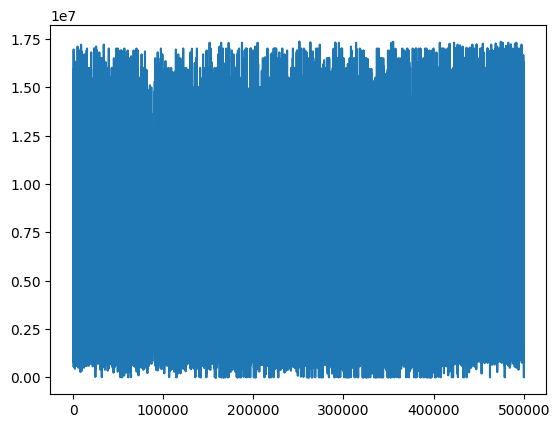

In [168]:
moscow_df['price'].plot()

In [169]:
moscow_df.describe()

,Unnamed: 0,price,date,level,levels,rooms,area,kitchen_area
count,4.983340e+05,4.983340e+05,498334.000000,498334.000000,498334.000000,498334.000000,498334.000000,498334.000000
mean,2.626985e+06,4.695857e+06,2019.309632,7.049417,12.741459,1.776818,51.460027,10.312356
std,1.605611e+06,2.353897e+06,0.879896,5.710637,7.389206,0.857090,22.998866,4.611920
min,1.000000e+00,1.000000e+00,2018.000000,1.000000,1.000000,0.000000,2.240000,0.050000
25%,1.227162e+06,3.000000e+06,2019.000000,3.000000,5.000000,1.000000,38.000000,7.000000
50%,2.548838e+06,4.300000e+06,2019.000000,5.000000,12.000000,2.000000,46.100000,9.600000
75%,4.068970e+06,5.948750e+06,2020.000000,10.000000,17.000000,2.000000,61.800000,12.000000
max,5.476996e+06,1.736218e+07,2021.000000,36.000000,39.000000,9.000000,5000.000000,180.000000


In [132]:
x = moscow_df[['building_type', 'level', 'levels',
               'rooms', 'area', 'kitchen_area', 'object_type']]
y = moscow_df['price']

In [133]:
numeric_features_x = ['level', 'levels', 'rooms', 'area',
                      'kitchen_area']

In [68]:
x_stand = x
y_stand = y

In [69]:
x_stand[numeric_features_x] = (x_stand[numeric_features_x] - x_stand[numeric_features_x].mean()) / x_stand[numeric_features_x].std()
y_stand = (y_stand - y_stand.mean()) / y_stand.std()

/var/folders/_2/pkx_4d210rqb19sgsjcpkzlr0000gn/T/ipykernel_4417/3934794955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_stand[numeric_features_x] = (x_stand[numeric_features_x] - x_stand[numeric_features_x].mean()) / x_stand[numeric_features_x].std()


In [70]:
x_stand = pd.get_dummies(x_stand)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_stand, y_stand, test_size=0.3, random_state=0)

## Model Fitting

In [170]:
moscow_df = pd.get_dummies(moscow_df, columns=['building_type', 'object_type'],dtype=int,drop_first=True)

In [173]:
moscow_df.head()

,Unnamed: 0,price,date,level,levels,rooms,area,kitchen_area,building_type_brick,building_type_monolithic,building_type_other,building_type_panel,building_type_wooden,object_type_preowned
0,1,8650000,2018,5,24,2,69.1,12.0,1,0,0,0,0,1
1,4,5450000,2018,13,14,2,60.0,10.0,1,0,0,0,0,1
2,5,3300000,2018,4,5,1,32.0,6.0,0,0,0,1,0,1
3,9,2800000,2018,9,10,2,55.0,8.0,0,0,0,1,0,1
4,10,6909880,2018,9,14,3,76.1,8.8,0,0,0,1,0,0


In [185]:
X = moscow_df[['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'building_type_brick', 'building_type_monolithic','building_type_other','building_type_panel','building_type_wooden','object_type_preowned']]
y = moscow_df[['price']]

Next, we will scale the data. Note that not all models require scaled data; while models like linear regression require scaling to avoid overemphasis of certain datapoints, models like descision trees (and, by extension, random forests) are not affected by unscaled variables.

It is also important to note that scaled data won't *negatively* impact descision trees, but we make a copy of scaled data to more explicitly demonstrate model understanding.

In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=0)

Trying Cart Regression using Decision Tree

In [189]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import metrics
from sklearn import tree # for decision tree models
from sklearn.ensemble import RandomForestRegressor

In [190]:
model = tree.DecisionTreeRegressor(criterion='squared_error', 
                                    splitter='best', 
                                    max_depth=15,
                                    min_samples_leaf=20, 
                                )
clf = model.fit(X_train, y_train)

In [191]:
y_pred_CART = clf.predict(X_test)

In [192]:
metrics.r2_score(y_test, y_pred_CART)

0.6926144574109871

In [193]:
metrics.mean_absolute_error(y_test,y_pred_CART)

0.38945848642024256

Try with using Randomized Search to find good parameters

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
model = tree.DecisionTreeRegressor()

In [196]:
params = {'criterion': ['squared_error'],
            'max_depth': range(1, 50, 2),
             'min_samples_leaf': range(1, 50, 2)}
             

In [197]:
model_search = RandomizedSearchCV(model, params,n_jobs=-1)

In [198]:
model_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': range(1, 50, 2),
                                        'min_samples_leaf': range(1, 50, 2)})

In [199]:
model_search.best_params_

{'min_samples_leaf': 33, 'max_depth': 21, 'criterion': 'squared_error'}

In [200]:
best_model_tree = model_search.best_estimator_

In [201]:
y_pred = best_model_tree.predict(X_test)

In [202]:
model_search.score(X_test, y_pred)

1.0

In [203]:
metrics.mean_absolute_error(y_test, y_pred)

0.3892721418015474

Trying Random Forest

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [212]:
forest_param = {'n_estimators': range(5, 15, 5), 'max_depth': range(1, 10, 2)}
forest_model = RandomForestRegressor(random_state=0)

In [213]:
forest_search = RandomizedSearchCV(forest_model, forest_param, n_jobs=-1)

In [215]:
forest_search.fit(X_train, y_train)

/Users/kerichen/Documents/GitHub/Group005-SP23/.conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kerichen/Documents/GitHub/Group005-SP23/.conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kerichen/Documents/GitHub/Group005-SP23/.conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ker

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 10, 2),
                                        'n_estimators': range(5, 15, 5)})

In [216]:
forest_search.best_params_

{'n_estimators': 10, 'max_depth': 9}

In [217]:
best_forest_model = forest_search.best_estimator_

In [220]:
y_pred_forest = best_forest_model.predict(X_test)

In [221]:
metrics.r2_score(y_test, y_pred_forest)

0.6750319793224887

In [222]:
metrics.mean_absolute_error(y_test, y_pred_forest)

0.4138291016068082